In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


In [3]:
image_data_path = '/content/drive/MyDrive/PreciousMD/STAN_patches_segs/patches'
labels_csv_path = '/content/drive/MyDrive/PreciousMD/STAN_patches_segs/labels/STAN_labels.csv'


In [5]:
labels_df = pd.read_csv(labels_csv_path)
print(labels_df.head())  # Display the first few rows of the labels dataframe


        UID  MUT_STATUS
0  SUB_0367           1
1  SUB_0368           0
2  SUB_0369           0
3  SUB_0370           0
4  SUB_0371           0


In [20]:
# List of patient IDs
patient_ids = os.listdir(image_data_path)
print(f"Total patients: {len(patient_ids)}")

Total patients: 116


0    93
1    23
Name: MUT_STATUS, dtype: int64
0    80.172414
1    19.827586
Name: MUT_STATUS, dtype: float64


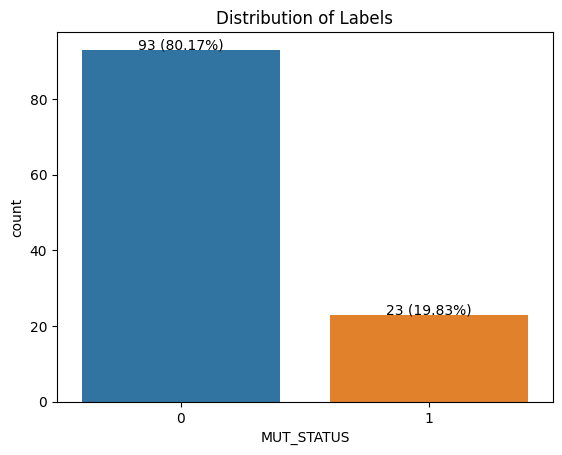

In [12]:
# Check the distribution of labels
label_distribution = labels_df['MUT_STATUS'].value_counts()
print(label_distribution)

# Get the distribution in percentages
label_distribution_percent = labels_df['MUT_STATUS'].value_counts(normalize=True) * 100
print(label_distribution_percent)

# Visualizing the distribution of labels along with counts
sns.countplot(x='MUT_STATUS', data=labels_df).set_title('Distribution of Labels')
for i, count in enumerate(label_distribution):
    plt.text(i, count, f'{count} ({label_distribution_percent.iloc[i]:.2f}%)', ha='center', va='baseline')
plt.show()

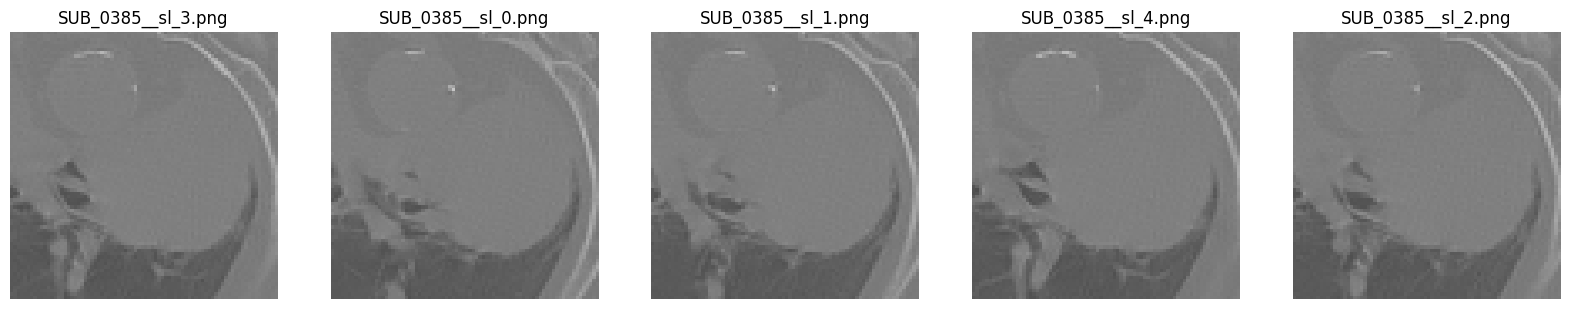

In [17]:
import cv2

def plot_images_for_patient(patient_id):
    patient_folder = os.path.join(image_data_path, patient_id)
    images = os.listdir(patient_folder)

    fig, axs = plt.subplots(1, 5, figsize=(20, 20))
    for i, image_file in enumerate(images[:5]):
        img_path = os.path.join(patient_folder, image_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i].imshow(img)
        axs[i].set_title(image_file)
        axs[i].axis('off')

# Plot images for a sample patient
plot_images_for_patient(patient_ids[0])


In [19]:
import numpy as np

# For simplicity, let's check the statistics for a single patient's images
patient_folder = os.path.join(image_data_path, patient_ids[0])
images = os.listdir(patient_folder)

pixel_values = []
for image_file in images:
    img_path = os.path.join(patient_folder, image_file)
    img = cv2.imread(img_path)
    pixel_values.extend(img.ravel())

pixel_values = np.array(pixel_values)
print(f"Mean: {np.mean(pixel_values)}, Std: {np.std(pixel_values)}, Min: {np.min(pixel_values)}, Max: {np.max(pixel_values)}")


Mean: 120.35284375, Std: 14.992430424653834, Min: 77, Max: 198


In [10]:
# Check if all images are of the same size
image_sizes = {img.size for img in images}
print(f'Unique Image Sizes: {image_sizes}')


Unique Image Sizes: {(27, 27)}


In [13]:
# Quick script to get the distribution of the number of images per patient
image_count_per_patient = {patient_id: len(os.listdir(os.path.join(image_data_path, patient_id))) for patient_id in labels_df['UID']}
image_count_distribution = pd.Series(image_count_per_patient).value_counts()
print(image_count_distribution)


5    116
dtype: int64


In [14]:
# Quick script to get unique image sizes across all patients
unique_image_sizes = set()
for patient_id in labels_df['UID']:
    patient_folder = os.path.join(image_data_path, patient_id)
    for img_name in os.listdir(patient_folder):
        img_path = os.path.join(patient_folder, img_name)
        img = Image.open(img_path)
        unique_image_sizes.add(img.size)
print(unique_image_sizes)


{(61, 61), (43, 43), (52, 52), (70, 70), (29, 29), (38, 38), (37, 37), (80, 80), (42, 42), (66, 66), (48, 48), (34, 34), (53, 53), (30, 30), (76, 76), (71, 71), (62, 62), (25, 25), (35, 35), (26, 26), (44, 44), (99, 99), (49, 49), (40, 40), (31, 31), (95, 95), (27, 27), (68, 68), (63, 63), (36, 36), (45, 45), (54, 54), (102, 102), (105, 105), (32, 32), (64, 64), (55, 55), (41, 41), (51, 51), (60, 60), (87, 87), (69, 69), (23, 23), (46, 46), (24, 24), (106, 106), (47, 47), (28, 28), (92, 92), (83, 83), (79, 79), (120, 120), (33, 33)}
